In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers


In [2]:
# Load dataset (digits 0–9 images)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize & flatten
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), -1))   # 28x28 → 784
x_test  = x_test.reshape((len(x_test), -1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
input_dim = 784
encoding_dim = 32  # bottleneck size

# Normal autoencoder
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation="relu")(input_img)
decoded = layers.Dense(input_dim, activation="sigmoid")(encoded)
autoencoder_normal = models.Model(input_img, decoded)
autoencoder_normal.compile(optimizer="adam", loss="mse")

# Sparse autoencoder (L1 activity regularizer enforces sparsity)
encoded_sparse = layers.Dense(
    encoding_dim, activation="relu",
    activity_regularizer=regularizers.l1(1e-5)
)(input_img)
decoded_sparse = layers.Dense(input_dim, activation="sigmoid")(encoded_sparse)
autoencoder_sparse = models.Model(input_img, decoded_sparse)
autoencoder_sparse.compile(optimizer="adam", loss="mse")


In [4]:
autoencoder_normal.fit(
    x_train, x_train,
    epochs=5, batch_size=256,
    shuffle=True, validation_data=(x_test, x_test)
)

autoencoder_sparse.fit(
    x_train, x_train,
    epochs=5, batch_size=256,
    shuffle=True, validation_data=(x_test, x_test)
)
autoencoder_normal.fit(
    x_train, x_train,
    epochs=5, batch_size=256,
    shuffle=True, validation_data=(x_test, x_test)
)

autoencoder_sparse.fit(
    x_train, x_train,
    epochs=5, batch_size=256,
    shuffle=True, validation_data=(x_test, x_test)
)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1062 - val_loss: 0.0422
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0385 - val_loss: 0.0297
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0281 - val_loss: 0.0231
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0222 - val_loss: 0.0189
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0186 - val_loss: 0.0163
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2217 - val_loss: 0.1929
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1554 - val_loss: 0.0884
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0861 - val_loss: 0.0813
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0803 - val_loss: 0.0777
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0769 - val_loss: 0.0751
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162 - val_loss: 0.0144
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0144

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


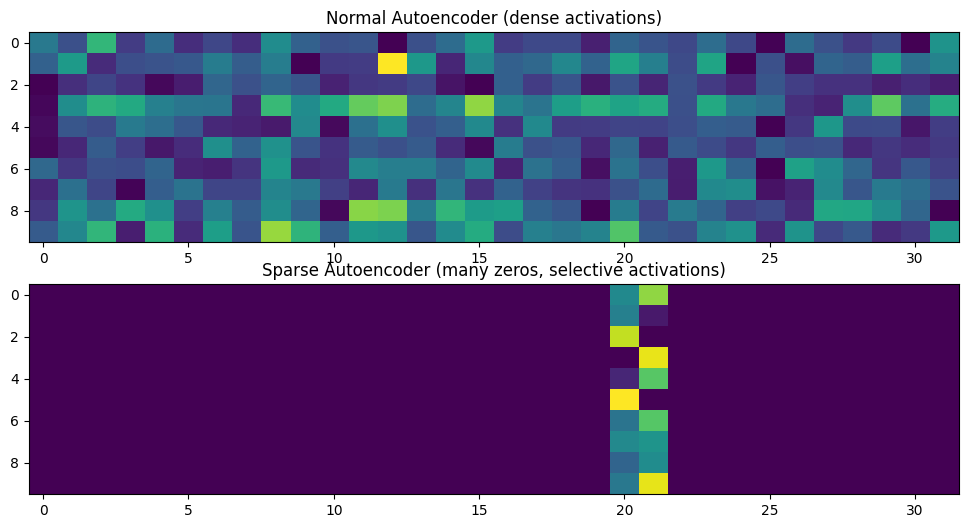

In [5]:
# Extract encoder parts
encoder_normal = models.Model(input_img, encoded)
encoder_sparse = models.Model(input_img, encoded_sparse)

# Take some test samples
sample_imgs = x_test[:10]

# Get activations
acts_normal = encoder_normal.predict(sample_imgs)
acts_sparse = encoder_sparse.predict(sample_imgs)

# Plot heatmaps
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
axes[0].imshow(acts_normal, cmap="viridis", aspect="auto")
axes[0].set_title("Normal Autoencoder (dense activations)")
axes[1].imshow(acts_sparse, cmap="viridis", aspect="auto")
axes[1].set_title("Sparse Autoencoder (many zeros, selective activations)")
plt.show()
